## Lung Cancer Patient Health and Treatment Records
- **Analysis performed by :-** Russel Anthony Reynold Chandanshiv


---

- Copyright (c) 2025 Russel Anthony Chandanshiv
- Licensed under the MIT License

---

### Introduction

You are provided with a data set titled ‘Lung Cancer Patient Health and Treatment Records’, which captures detailed information about patient demographics, diagnosis stage, lifestyle risk factors, comorbidities and treatment outcomes. 

**Note:** This data set was inspired by various healthcare-related learning resources and is not intended to represent real patient data.

The Data Set contains **`17 Features` and `8,90,000 Observations`**. Each observation recorded in the Data Set belongs to a Single Patient who is/was diagnosed of Lung Cancer.

---

**Features**
- **`id`** - Unique Identification Number for patient.
- **`age`** - Age of the patient `(In Years)`
- **`gender`** - Gender / Sex of the patient `(Male / Female / Others)`
- **`country`** - Which country the patient is from `(Residence)`
- **`diagnosis_date`** - Date the patient was diagnosed with Lung Cancer.
- **`cancer_stage`** - Stage of the Cancer `(Stage I, Stage II, Stage III, Stage IV)`
- **`family_history`** - Indicates if the patient has a history of cancer in the family `(Yes / No)`
- **`smoking_status`** - Patient's Smoking Habit `(Passive Smoker, Former Smoker, Current Smoker, Never Smoked)`
- **`bmi`** - Body Mass Index of the patient.
- **`cholesterol_level`** - Cholestrol Level of the patient.
- **`hypertension`** - Indicates if the patient had Hypertension `(1 = Yes, 0 = No)`
- **`asthma`** - Indicates if the patient had Asthma `(1 = Yes, 0 = No)`
- **`cirrhosis`** - Indicates if the patient had Cirrhosis `(1 = Yes, 0 = No)`
- **`other_cancer`** - Indicates if the patient had any Other Cancer `(1 = Yes, 0 = No)`
- **`treatment_type`** - The type of treatment given to the patient.
- **`end_treatment_date`** – Date when the treatment ended.
- **`survived`**- Indicates if the patient had survived `(1 = Yes, 0 = No)`

**Assumptions**
- For features that were numerical in nature `(1 = Yes, 0 = No)`
- Date Feature is formatted already. `[yyyy-mm-dd]`
- Missing Values are assumed to be Null.

**Libraries and Dependencies**
- NumPy
- Pandas
- Matplotlib
- PySpark
- Plotly

**WARNING:** Do not re-run this notebook without installing all required libraries and dependencies.

**Note:** The dataset used in this analysis is not publicly shared to ensure compliance with copyright and data ownership regulations. This notebook contains only the analytical workflow, methodologies, and visualizations derived from the dataset. All analysis and conclusions are original and created for educational and research purposes.

---

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, LongType, DateType, FloatType, DoubleType, TimestampType, DateType
from pyspark.sql.functions import col, trim

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Initializing Spark session and Confirming if the Spark Session actually exists.

try:
    spark = (
             SparkSession.builder 
            .appName("LungCancerAnalysis")
            .getOrCreate()
)
except Exception:
    print ("SparkSession is not currently Active. This is due to {Exception}.")
else:
    if isinstance(spark, SparkSession) and "spark" in locals():
        print ("SparkSession is currently Active.")  


SparkSession is currently Active.


In [2]:
# Reading the Lung Cancer Dataset
lung_cancer_df = spark.read.csv ("Lung Cancer.csv", inferSchema = True, header = True)

# Caching the Dataset for faster computations
lung_cancer_df.cache()

# Calling an Action after caching (Viewing first 10 Rows)
print ("The first few rows of the PySpark Lung Cancer DataFrame as follows:\n")
lung_cancer_df.count()

# For Display Purpose (Github Viewers)
lung_cancer_df.limit(10).toPandas()


The first few rows of the PySpark Lung Cancer DataFrame as follows:



,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0
5,6,50.0,Male,Italy,2023-01-02,Stage I,No,Never Smoked,37.6,274,1,0,0,0,Radiation,2024-12-27,0
6,7,49.0,Female,Croatia,2018-05-21,Stage III,Yes,Passive Smoker,43.1,259,0,0,0,0,Radiation,2019-05-06,1
7,8,51.0,Male,Denmark,2017-02-18,Stage IV,Yes,Former Smoker,25.8,195,1,1,0,0,Combined,2017-08-26,0
8,9,64.0,Male,Sweden,2021-03-21,Stage III,Yes,Current Smoker,21.5,236,0,0,0,0,Chemotherapy,2022-03-07,0
9,10,56.0,Male,Hungary,2021-11-30,Stage IV,Yes,Current Smoker,17.3,183,1,0,0,1,Surgery,2023-11-29,0


In [3]:
# Print the schema of the DataFrame
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print ("The Schema of the Spark Lung Cancer DataFrame is as follows:\n")
lung_cancer_df.printSchema()


The Schema of the Spark Lung Cancer DataFrame is as follows:

root
 |-- id: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- gender: string (nullable = true)
 |-- country: string (nullable = true)
 |-- diagnosis_date: date (nullable = true)
 |-- cancer_stage: string (nullable = true)
 |-- family_history: string (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- bmi: double (nullable = true)
 |-- cholesterol_level: integer (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- asthma: integer (nullable = true)
 |-- cirrhosis: integer (nullable = true)
 |-- other_cancer: integer (nullable = true)
 |-- treatment_type: string (nullable = true)
 |-- end_treatment_date: date (nullable = true)
 |-- survived: integer (nullable = true)



In [4]:
print (f"The total number of rows in our PySpark DataSet : {lung_cancer_df.count():,} Rows.")


The total number of rows in our PySpark DataSet : 890,000 Rows.


---

#### Data Cleaning and Standardization Function

In [5]:
# Detect features which have "Yes" and "No".
# Convert the features into 1 and 0 respectively.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def converting_yes_and_no(dataframe):
    """
    Docstring: 
              Take's the Lung Cancer DataFrame as an input.
              Checks which feature's have "yes" and "no".
              Convert's those particular features into 1 and 0 respectively.
              Returns a Lung Cancer DataFrame with the converted features.
    Parameters: 
               Spark DataFrame
    Arguments: 
               Lung Cancer PySpark DataFrame
    Returns:
               New Lung Cancer PySpark DataFrame -- Features which were "Yes" and "No" have been converted to 1 and 0 respectively.
    """
    
    # Empty List :- List of Features which have Yes or No will be appended.
    contains_yes_no = []
    
    # Creating a Temporary View for SQL 
    dataframe.createOrReplaceTempView("lung_cancer_view")

    # Scalable SQL Logic to detect "Yes" and "No" across all features.
    for column in dataframe.columns:
        sql_query = f"""
                        SELECT 
                            COUNT (`{column}`)
                        FROM
                            lung_cancer_view
                        WHERE
                            TRIM (UPPER(`{column}`)) IN ('YES','NO')
                     """
        if spark.sql(sql_query).collect()[0][0] > 0:
            contains_yes_no.append(column)

   # Logic for converting Yes and No of all columns
    for column in contains_yes_no:
   
        # Creating a Temporary View for SQL 
        dataframe.createOrReplaceTempView("lung_cancer_view")

        # SQL Query
        sql_query = f"""
                        SELECT *, 
                        CAST
                            (CASE
                                WHEN TRIM (UPPER(`{column}`)) = 'YES' THEN 1
                                WHEN TRIM (UPPER(`{column}`)) = 'NO' THEN 0
                                ELSE `{column}` 
                                END AS INT)
                            AS 
                              converted_{column}
                        FROM
                            lung_cancer_view
                     """

        # Running the SQL Query
        new_conversion_df = spark.sql(sql_query)

        # Dropping existing feature and Overwriting with the converted feature
        dataframe = new_conversion_df.drop(column).withColumnRenamed(f"converted_{column}", column)

    # Returns a PySpark DataFrame
    return dataframe
    

In [6]:
# Check's the DataType and Ensures correct conversion
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def type_checker (dataframe):
    """
    Docstring: 
              Take's a dataframe as input.
              Checks which feature's are numeric in nature.
              Checking the numeric nature of the feature "Integer" or "Float"
              Returns a DataType Dictionary and Cast Features Respectively.
              Clean's Leading and Trailing white spaces for "String" type features.
    Parameters: 
               Spark DataFrame
    Arguments: 
               Lung Cancer PySpark DataFrame
    Returns:
               DataType Dictionary, DataFrame
    """
    
    # List for Type
    type_dict = dict()
    
    # Creating a Temporary View for SQL 
    dataframe.createOrReplaceTempView("lung_cancer_view")

    # Checking only Relevant Features (Numeric)
    for column, datatype in dataframe.dtypes:
        if datatype in ["float", "double", "bigint", "int"]:
                
            # Checking The Exact DataType for the respective Feature
            sql_query = f"""
                           WITH verify_cte AS 
                            (SELECT 
                                    COUNT (`{column}`) AS verify
                                FROM 
                                    lung_cancer_view
                                WHERE
                                    `{column}` % 1 != 0)
                     
                             SELECT CASE 
                                         WHEN verify = 0 
                                                     THEN 'INTEGER'
                                           WHEN verify > 0 
                                                     THEN 'FLOAT'
                                     END AS
                                          IS_AGE_FLOAT_OR_INTEGER
                              FROM
                                   verify_cte
                         """
           
            # Assigning the Correct DataTypes
            
            if spark.sql(sql_query).collect()[0][0].upper() == "INTEGER":
                type_dict [column] = LongType()
                dataframe = dataframe.withColumn(column, col(column).cast("long"))
                
            else:
                type_dict [column] = DoubleType()
                dataframe = dataframe.withColumn(column, col(column).cast("double"))

        if datatype in ["string"]:
            # Clean Spaces (If it is a string) --- Leading and Trailing white spaces
            dataframe = dataframe.withColumn(column, trim(col(column)))
            
    return type_dict, dataframe
    

In [7]:
# Data Cleaning and Standardization Function : Remove's Duplicate Rows, Ensures correct data types, Convert all "yes" and "no" features to 1 and 0 
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def spark_cleaning(dataframe):
    """
    Docstring:
              Drop's duplicate Rows.  
              Take's a dataframe as input.
              Checks which feature's have "yes" and "no".
              Convert's those particular features into 1 and 0 respectively.
              Clean's Leading and Trailing white spaces.
              Ensures correct datatype of all the features.     
    Parameters: 
               Spark DataFrame
    Arguments: 
               Lung Cancer PySpark DataFrame
    Returns:
               Cleaned DataFrame
    """
    
    # Dropping Duplicate Rows
    lung_cancer_df = dataframe.dropDuplicates()

    # Yes or No -- Converting to 1 and 0
    lung_cancer_df = converting_yes_and_no(lung_cancer_df)
    
    # DataType Dictionary
    datatype_dictionary, lung_cancer_df = type_checker (lung_cancer_df)

    # New Schema
    lung_cancer_schema = StructType([
                                     StructField("id", datatype_dictionary.get("id", LongType()), False),
                                     StructField("age", datatype_dictionary.get("age", IntegerType()), True),
                                     StructField("gender", StringType(), True),
                                     StructField("country", StringType(), True),
                                     StructField("diagnosis_date", DateType(), True),
                                     StructField("cancer_stage", StringType(), True),
                                     StructField("smoking_status", StringType(), True),
                                     StructField("bmi", datatype_dictionary.get("bmi", DoubleType()), True),
                                     StructField("cholesterol_level", datatype_dictionary.get("cholesterol_level", LongType()), True),
                                     StructField("hypertension", IntegerType(), True),
                                     StructField("asthma", IntegerType(), True),
                                     StructField("cirrhosis", IntegerType(), True),
                                     StructField("other_cancer", IntegerType(), True),
                                     StructField("treatment_type", StringType(), True),
                                     StructField("end_treatment_date", DateType(), True),
                                     StructField("survived", IntegerType(), True),
                                     StructField("family_history", IntegerType(), True)
                                    ])

    # Creates a DataFrame with the new schema
    lung_cancer_df = spark.createDataFrame(lung_cancer_df.rdd, schema= lung_cancer_schema)

    # Caching
    lung_cancer_df.cache()

    # Returning a new dataframe
    return lung_cancer_df
    

In [8]:
# Ordering the Cleaned DataFrame and Viewing it
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
lung_cancer_df = spark_cleaning(lung_cancer_df).orderBy("id")

print ("The first few rows of the PySpark Lung Cancer DataFrame as follows:\n")

# For Display Purpose (Github Viewers)
lung_cancer_df.limit(10).toPandas()


The first few rows of the PySpark Lung Cancer DataFrame as follows:



,id,age,gender,country,diagnosis_date,cancer_stage,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,family_history
0,1,64,Male,Sweden,2016-04-05,Stage I,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0,1
1,2,50,Female,Netherlands,2023-04-20,Stage III,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1,1
2,3,65,Female,Hungary,2023-04-05,Stage III,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0,1
3,4,51,Female,Belgium,2016-02-05,Stage I,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0,0
4,5,37,Male,Luxembourg,2023-11-29,Stage I,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0,0
5,6,50,Male,Italy,2023-01-02,Stage I,Never Smoked,37.6,274,1,0,0,0,Radiation,2024-12-27,0,0
6,7,49,Female,Croatia,2018-05-21,Stage III,Passive Smoker,43.1,259,0,0,0,0,Radiation,2019-05-06,1,1
7,8,51,Male,Denmark,2017-02-18,Stage IV,Former Smoker,25.8,195,1,1,0,0,Combined,2017-08-26,0,1
8,9,64,Male,Sweden,2021-03-21,Stage III,Current Smoker,21.5,236,0,0,0,0,Chemotherapy,2022-03-07,0,1
9,10,56,Male,Hungary,2021-11-30,Stage IV,Current Smoker,17.3,183,1,0,0,1,Surgery,2023-11-29,0,1


In [9]:
# Let's View the Schema
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print ("The Schema of the Spark Lung Cancer DataFrame is as follows:\n")
lung_cancer_df.printSchema()


The Schema of the Spark Lung Cancer DataFrame is as follows:

root
 |-- id: long (nullable = false)
 |-- age: long (nullable = true)
 |-- gender: string (nullable = true)
 |-- country: string (nullable = true)
 |-- diagnosis_date: date (nullable = true)
 |-- cancer_stage: string (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- bmi: double (nullable = true)
 |-- cholesterol_level: long (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- asthma: integer (nullable = true)
 |-- cirrhosis: integer (nullable = true)
 |-- other_cancer: integer (nullable = true)
 |-- treatment_type: string (nullable = true)
 |-- end_treatment_date: date (nullable = true)
 |-- survived: integer (nullable = true)
 |-- family_history: integer (nullable = true)



In [10]:
# Checking the Total Number of Missing Values in Our Dataset
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Dropping the View if it exists
spark.sql("DROP VIEW IF EXISTS missing_value_view")

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Creating a Temporary View
lung_cancer_df.createTempView("missing_value_view")

# Column Names (Storing in individual variables for easy access)
col_1, col_2, col_3, col_4, col_5, col_6, col_7, col_8, col_9, col_10, col_11, col_12, col_13, col_14, col_15, col_16, col_17 = lung_cancer_df.columns

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Check for missing values
number_of_missing_vals = spark.sql(f"""
                                    SELECT COUNT(*) AS `Number of Missing Values`
                                    FROM missing_value_view  
                                    WHERE 
                                    {col_1} IS NULL 
                                    OR 
                                    {col_2} IS NULL
                                    OR
                                    {col_3} IS NULL
                                    OR
                                    {col_4} IS NULL
                                    OR
                                    {col_5} IS NULL
                                    OR
                                    {col_6} IS NULL
                                    OR
                                    {col_7} IS NULL 
                                    OR
                                    {col_8} IS NULL 
                                    OR 
                                    {col_9} IS NULL
                                    OR
                                    {col_10} IS NULL
                                    OR
                                    {col_11} IS NULL
                                    OR
                                    {col_12} IS NULL
                                    OR
                                    {col_13} IS NULL
                                    OR
                                    {col_14} IS NULL  
                                    OR
                                    {col_15} IS NULL
                                    OR
                                    {col_16} IS NULL  
                                    OR
                                    {col_17} IS NULL                                      
""")
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Let's view the count of missing values
number_of_missing_vals.show()


+------------------------+
|Number of Missing Values|
+------------------------+
|                       0|
+------------------------+



In [11]:
# Saving the cleaned dataframe as a parquet file (best for big data)

lung_cancer_df.write.mode("overwrite").parquet("output/lung_cancer_df.parquet")


---

#### Treatment Duration Calculation Function

In [12]:
# Calculating the Treatment Duration for each cancer patient.
# Calculating the Average Treatment Duration for each Treatment Type.
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def treatment_duration_days(dataframe):
    """
    Docstring:
              Take's the Lung Cancer DataFrame as an input.
              Creates a New Feature `treatment_duration_days` using the difference between `end_treatment_date` and `diagnosis_date`.
              Calculates the Average Treatment Duration for each `treatment_type`.
              Returns two PySpark DataFrames:
                                               (1) Lung Cancer DataFrame with the New Feature added.
                                               (2) Average Duration DataFrame showing Treatment Type and Average Duration in Days for each type.
    Parameters:
              Spark DataFrame
    Arguments:
              Lung Cancer PySpark DataFrame
    Returns:
              Two PySpark DataFrames:
                                      (1) Lung Cancer DataFrame with New Feature (Duration of treatment in Days)
                                      (2) Average Duration DataFrame
    """
    
    # Creating a Temporary View for SQL 
    dataframe.createOrReplaceTempView("lung_cancer_view")

    # SQL Query
    sql_query_1 = """
                     SELECT *,
                         DATEDIFF(end_treatment_date, diagnosis_date) AS treatment_duration_days
                     FROM
                         lung_cancer_view
                  """

    # Average Treatment Duration for Each Type
    sql_query_2 = f"""
                      WITH AVERAGE_DURATION_CTE 
                                              AS ({sql_query_1})
                      SELECT
                          treatment_type AS TREATMENT_TYPE,
                          CONCAT (ROUND (AVG(treatment_duration_days), 2), " Days") AS AVERAGE_TREATMENT_DURATION
                      FROM
                      AVERAGE_DURATION_CTE
                      GROUP BY
                          treatment_type
                      ORDER BY 
                          AVERAGE_TREATMENT_DURATION
                    """

    # Lung Cancer DataFrame with the New Feature (Treatment Duration)
    lung_cancer_df = spark.sql(sql_query_1)
    
    # Average Treatment Duration for Each Treatment Type
    average_duration_for_type = spark.sql(sql_query_2)
    
    return lung_cancer_df, average_duration_for_type
    
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Assigning the DataFrames Globally
lung_cancer_df, average_duration_for_type = treatment_duration_days(lung_cancer_df)

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Let's View The First Few Rows with the New Feature
print ("The first few rows of the PySpark Lung Cancer DataFrame is as follows:\n")

# For Display Purpose (Github Viewers)
lung_cancer_df.limit(10).toPandas()

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Let's View The Average Duration for Each Treatment Type
print ("The Average Duration in Days for Each Treatment Type is as follows:\n")
average_duration_for_type.show()


The first few rows of the PySpark Lung Cancer DataFrame is as follows:

The Average Duration in Days for Each Treatment Type is as follows:

+--------------+--------------------------+
|TREATMENT_TYPE|AVERAGE_TREATMENT_DURATION|
+--------------+--------------------------+
|       Surgery|               457.74 Days|
|      Combined|               457.82 Days|
|     Radiation|                458.4 Days|
|  Chemotherapy|                458.4 Days|
+--------------+--------------------------+



---

#### Determine Highest Survival Rate by Smoking Status

In [13]:
# Which group had the highest survival rate based on their smoking status
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def smoking_status (dataframe):
    """
    Docstring: 
              Take's the Lung Cancer DataFrame as an input.
              Correctly identifies the Smoking Status groups.
              Finds the group with the highest survival rate among all groups.
    Parameters: 
               Spark DataFrame
    Arguments: 
               Lung Cancer PySpark DataFrame
    Returns:
               PySpark DataFrame with the Smoking Status Group and Survival Rate.
               (Smoking status group and their respective survival rate)
               (Group with the highest survival rate)
    """
    
    # Creating a Temporary View for SQL 
    dataframe.createOrReplaceTempView("lung_cancer_view")

    # SQL Query
    sql_query_1 = """
                     SELECT smoking_status AS `SMOKING STATUS`,
                        CONCAT (ROUND (AVG(survived) * 100, 2), ' %')  AS `SURVIVAL RATE`,
                        COUNT (*) AS `NUMBER OF PATIENTS`,
                        SUM (survived) AS `NUMBER OF SURVIVORS`
                     FROM
                         lung_cancer_view
                     GROUP BY
                         `SMOKING STATUS`
                     ORDER BY 
                         `SURVIVAL RATE` DESC
                  """

    return spark.sql(sql_query_1)
    

In [14]:
# Calling the Function : Survival Rate of Different Groups
# Note : Could have used `LIMIT 1` but wanted a better analytics perspective of the different groups
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print (f"The Survival Rate of different groups as per our lung cancer dataset:-\n")
smoking_status (lung_cancer_df).show()

smoking_status_df = smoking_status (lung_cancer_df).toPandas()


The Survival Rate of different groups as per our lung cancer dataset:-

+--------------+-------------+------------------+-------------------+
|SMOKING STATUS|SURVIVAL RATE|NUMBER OF PATIENTS|NUMBER OF SURVIVORS|
+--------------+-------------+------------------+-------------------+
|  Never Smoked|      22.09 %|            222751|              49208|
|Current Smoker|      22.03 %|            221898|              48893|
|Passive Smoker|       22.0 %|            223170|              49103|
| Former Smoker|      21.96 %|            222181|              48800|
+--------------+-------------+------------------+-------------------+



In [15]:
# Calling the Function : Group with the Highest Survival Rate
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print (f"Group : `{smoking_status (lung_cancer_df).collect()[0][0]}`, has the Highest Survival Rate of {smoking_status (lung_cancer_df).collect()[0][1]} as per our lung cancer dataset:-\n")
smoking_status (lung_cancer_df).show(1)


Group : `Never Smoked`, has the Highest Survival Rate of 22.09 % as per our lung cancer dataset:-

+--------------+-------------+------------------+-------------------+
|SMOKING STATUS|SURVIVAL RATE|NUMBER OF PATIENTS|NUMBER OF SURVIVORS|
+--------------+-------------+------------------+-------------------+
|  Never Smoked|      22.09 %|            222751|              49208|
+--------------+-------------+------------------+-------------------+
only showing top 1 row



---

#### Top Countries by Stage IV Diagnosis Percentage

In [16]:
# The Top 3 countries with the highest percentage of patients diagnosed in Stage IV
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def stage_four_detector(dataframe, order = "ASC", limit = 3):
    """
    Docstring: 
               Take's the Lung Cancer DataFrame as an input.
               Calculate the percentage of Stage IV patients for each country.
               Returns a PySpark DataFrame for the Top 3 Countries with Highest Percentage of Patients diagnosed in Stage IV.
    Parameters: 
               Spark DataFrame
               order : (type : str)
                       ASC (Default Order -- lowest to highest)
                       DESC (highest to lowest -- if specified)
               limit : (type : int)
                       Top N Rows
    Arguments: 
               Lung Cancer PySpark DataFrame
               order : [ASC, DESC]
               limit : Top N (number)
    Returns:
               PySpark DataFrame with the Top 3 (default) Countries with the Highest Percentage of Patients diagnosed in Stage IV. (Depending on `order`and `limit`)
               PySpark DataFrame with the Top 3 (default) Countries with the Lowest Percentage of Patients diagnosed in Stage IV. (Depending on `order` and `limit`)
    """
    # Checking if the argument's are valid
    order = order.strip().upper()
    
    if order not in ["ASC", "DESC"]:
        raise ValueError ("Invalid input, use `ASC` or `DESC`.")
        
    # Creating a Temporary View for SQL 
    dataframe.createOrReplaceTempView("lung_cancer_view")

    # SQL Query
    sql_query_1= f"""
                     WITH TOTAL_COUNT_CTE AS
                             (SELECT
                                 COUNT(*) AS TOTAL_NUMBER_OF_PATIENTS,
                                 country AS `COUNTRY`
                             FROM
                                lung_cancer_view
                             GROUP BY
                                 country),
                     
                     STAGE_FOUR_CTE AS
                             (SELECT
                                 COUNT (*) AS TOTAL_STAGE_IV_PATIENTS,
                                 country AS `COUNTRY`
                              FROM
                                  lung_cancer_view
                              WHERE
                                  UPPER(cancer_stage) = 'STAGE IV'                                  
                              GROUP BY
                                  country)

                     SELECT
                         `COUNTRY`,
                         CONCAT (ROUND ((TOTAL_STAGE_IV_PATIENTS / TOTAL_NUMBER_OF_PATIENTS) * 100, 2), " %") 
                                                                                     AS `PERCENTAGE OF STAGE IV`
                     FROM
                         TOTAL_COUNT_CTE
                     INNER JOIN
                         STAGE_FOUR_CTE
                     USING 
                         (country)
                     ORDER BY
                         `PERCENTAGE OF STAGE IV` {order}
                     LIMIT {limit}
                  """

    return spark.sql (sql_query_1)
    

In [17]:
# Calling the function : Top 3 Countries (Highest Percentage of Stage IV patients)
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print ("The Top 3 Countries with the Highest Percentage of patients diagnosed with Stage IV Cancer:-\n")
stage_four_detector(dataframe= lung_cancer_df, order= "DESC", limit= 3).show()


The Top 3 Countries with the Highest Percentage of patients diagnosed with Stage IV Cancer:-

+--------------+----------------------+
|       COUNTRY|PERCENTAGE OF STAGE IV|
+--------------+----------------------+
|        Greece|                25.5 %|
|       Croatia|               25.43 %|
|Czech Republic|               25.29 %|
+--------------+----------------------+



In [18]:
# Calling the function : Top 3 Countries (Lowest Percentage of Stage IV patients)
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print ("The Top 3 Countries with the Lowest Percentage of patients diagnosed with Stage IV Cancer:-\n")
stage_four_detector(dataframe= lung_cancer_df, order= "ASC", limit= 3).show()


The Top 3 Countries with the Lowest Percentage of patients diagnosed with Stage IV Cancer:-

+--------+----------------------+
| COUNTRY|PERCENTAGE OF STAGE IV|
+--------+----------------------+
| Estonia|               24.31 %|
|Bulgaria|               24.51 %|
|Slovakia|               24.64 %|
+--------+----------------------+



---

#### Identify High-Risk Males and Compute Average Age & Hypertension Metrics

In [19]:
# A function that filters and finds the average age of the specified people and the percentage of them who had hypertension
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def patient_filter(dataframe):
    """
    Docstring: 
              Take's the Lung Cancer DataFrame as an input.
              Filter's out patients who are:
                                              (1) Are Male
                                              (2) Diagnosed in either Stage III or Stage IV
                                              (3) Have a family history of cancer
                                              (4) Are currently smokers
                                              (5) Have a BMI > 30
                                              (6) Patients who have survived
              Returns Average Age of these patients. Percentage of these patients who had hypertension.
    Parameters: 
               Spark DataFrame
    Arguments: 
               Lung Cancer PySpark DataFrame
    Returns:
               PySpark DataFrame with Average Age of patients meeting our specified conditions and Percentage of these patients who had hypertension.
    """
    
    # Creating a Temporary View for SQL 
    dataframe.createOrReplaceTempView("lung_cancer_view")

    # SQL Query -- To create a Filtered view
    filtered_view ="""
                     CREATE OR REPLACE
                         TEMP VIEW 
                             patient_view AS
                                 SELECT
                                       *
                                 FROM 
                                     lung_cancer_view
                                 WHERE
                                    (UPPER (gender) = 'MALE')
                                             AND
                                    (UPPER(cancer_stage) IN ('STAGE III', 'STAGE IV'))
                                             AND
                                    (family_history = 1)
                                             AND
                                    (UPPER(smoking_status) = 'CURRENT SMOKER')
                                             AND
                                          (bmi > 30)
                                             AND
                                        (survived = 1)
                   """
    # Creating the filtered view
    spark.sql(filtered_view)

    # Querying the Filtered View
    sql_query_1 = """
                     WITH PATIENT_FILTER_CTE AS
                                 (SELECT 
                                     CONCAT (ROUND (AVG(age), 2), ' Years') AS AVERAGE_AGE,
                                     CONCAT (ROUND (SUM (hypertension) / COUNT (*) * 100, 2), ' %')
                                                                                AS PERCENTAGE_OF_PATIENTS_HYPERTENSION                                     
                                 FROM
                                     patient_view)

                                  SELECT 
                                      AVERAGE_AGE,
                                      PERCENTAGE_OF_PATIENTS_HYPERTENSION
                                  FROM
                                      PATIENT_FILTER_CTE

                  """
    
    return spark.sql (sql_query_1)
    

In [20]:
# Average Age of Patient meeting the specific conditions and Percentage of them with Hypertension
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print (f"The Average Age of the Specified Patients is {patient_filter(lung_cancer_df).collect()[0][0]}. The Percentage of patients with Hypertension among those with specified conditions {patient_filter(lung_cancer_df).collect()[0][1]}\n")
patient_filter(lung_cancer_df).show()


The Average Age of the Specified Patients is 55.18 Years. The Percentage of patients with Hypertension among those with specified conditions 74.77 %

+-----------+-----------------------------------+
|AVERAGE_AGE|PERCENTAGE_OF_PATIENTS_HYPERTENSION|
+-----------+-----------------------------------+
|55.18 Years|                            74.77 %|
+-----------+-----------------------------------+



---

#### Gender-Based Classification of Cancer Patients

In [21]:
# Gender Based Classification of Cancer Patients
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Creating a Temporary View for SQL 
lung_cancer_df.createOrReplaceTempView("lung_cancer_view")
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Query for Gender Based Analysis
sql_query_1 = f"""
                  WITH TOTAL_COUNT_CTE AS
                  (SELECT 
                      COUNT(*) AS TOTAL_COUNT
                  FROM
                      lung_cancer_view),

                  MALE_COUNT_CTE AS
                  (SELECT 
                      COUNT(*) AS MALE_COUNT
                  FROM
                      lung_cancer_view
                  WHERE
                      UPPER (gender) = 'MALE'),

                  FEMALE_COUNT_CTE AS
                  (SELECT 
                      COUNT(*) AS FEMALE_COUNT
                  FROM
                      lung_cancer_view
                  WHERE
                      UPPER (gender) = 'FEMALE'),

                  SURVIVAL_COUNT_CTE AS
                  (SELECT 
                      COUNT(*) AS TOTAL_SURVIVAL_COUNT
                  FROM
                      lung_cancer_view
                  WHERE 
                      survived = 1),

                  SURVIVAL_MALE_COUNT_CTE AS
                  (SELECT 
                      COUNT(*) AS SURVIVAL_MALE_COUNT
                  FROM
                      lung_cancer_view
                  WHERE
                      UPPER (gender) = 'MALE'
                              AND
                      survived = 1),

                  SURVIVAL_FEMALE_COUNT_CTE AS
                  (SELECT 
                      COUNT(*) AS SURVIVAL_FEMALE_COUNT
                  FROM
                      lung_cancer_view
                  WHERE
                      UPPER (gender) = 'FEMALE'                      
                              AND
                          survived = 1)
                      
                  SELECT
                      M.MALE_COUNT,
                      F.FEMALE_COUNT,
                      T.TOTAL_COUNT,
                      SC.TOTAL_SURVIVAL_COUNT,
                      SMC.SURVIVAL_MALE_COUNT,
                      SFC.SURVIVAL_FEMALE_COUNT,
                      CONCAT (ROUND((M.MALE_COUNT / T.TOTAL_COUNT) * 100, 2), " %") AS MALE_PERCENTAGE,
                      CONCAT (ROUND((F.FEMALE_COUNT / T.TOTAL_COUNT) * 100, 2), " %") AS FEMALE_PERCENTAGE,
                      CONCAT (ROUND((SMC.SURVIVAL_MALE_COUNT / M.MALE_COUNT) * 100, 2), " %") AS SURVIVAL_MALE_PERCENTAGE,
                      CONCAT (ROUND((SFC.SURVIVAL_FEMALE_COUNT / F.FEMALE_COUNT) * 100, 2), " %") AS SURVIVAL_FEMALE_PERCENTAGE,
                      CONCAT (ROUND((SC.TOTAL_SURVIVAL_COUNT / T.TOTAL_COUNT) * 100, 2), " %") AS TOTAL_SURVIVAL_PERCENTAGE
                  FROM
                      MALE_COUNT_CTE AS M
                  CROSS JOIN
                      FEMALE_COUNT_CTE AS F
                  CROSS JOIN
                      TOTAL_COUNT_CTE AS T
                  CROSS JOIN
                      SURVIVAL_COUNT_CTE AS SC
                  CROSS JOIN
                      SURVIVAL_MALE_COUNT_CTE AS SMC
                  CROSS JOIN
                      SURVIVAL_FEMALE_COUNT_CTE AS SFC
              """
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Let's View the Results
print ("Detailed Analysis on the basis of Gender (Male) is as follows:-\n")
spark.sql(sql_query_1).select("MALE_COUNT", "MALE_PERCENTAGE", "SURVIVAL_MALE_COUNT", "SURVIVAL_MALE_PERCENTAGE").show()

print ("Detailed Analysis on the basis of Gender (Female) is as follows:-\n")
spark.sql(sql_query_1).select("FEMALE_COUNT", "FEMALE_PERCENTAGE", "SURVIVAL_FEMALE_COUNT", "SURVIVAL_FEMALE_PERCENTAGE").show()

print ("Detailed Analysis on the basis of survivors is as follows:-\n")
spark.sql(sql_query_1).select("TOTAL_COUNT", "TOTAL_SURVIVAL_COUNT", "TOTAL_SURVIVAL_PERCENTAGE").show()

kpi_df = spark.sql(sql_query_1).toPandas()


Detailed Analysis on the basis of Gender (Male) is as follows:-

+----------+---------------+-------------------+------------------------+
|MALE_COUNT|MALE_PERCENTAGE|SURVIVAL_MALE_COUNT|SURVIVAL_MALE_PERCENTAGE|
+----------+---------------+-------------------+------------------------+
|    445134|        50.02 %|              98172|                 22.05 %|
+----------+---------------+-------------------+------------------------+

Detailed Analysis on the basis of Gender (Female) is as follows:-

+------------+-----------------+---------------------+--------------------------+
|FEMALE_COUNT|FEMALE_PERCENTAGE|SURVIVAL_FEMALE_COUNT|SURVIVAL_FEMALE_PERCENTAGE|
+------------+-----------------+---------------------+--------------------------+
|      444866|          49.98 %|                97832|                   21.99 %|
+------------+-----------------+---------------------+--------------------------+

Detailed Analysis on the basis of survivors is as follows:-

+-----------+------------

---

#### Stage-Wise Survival Analysis on the basis of Gender

In [22]:
# Stage-Wise Survival Analysis
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Creating a Temporary View for SQL 
lung_cancer_df.createOrReplaceTempView("lung_cancer_view")
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# General Stage Wise Analysis
sql_query_1 = f"""
                  SELECT 
                      cancer_stage AS `CANCER STAGE`,
                      COUNT (*) AS `PATIENT COUNT`,
                      SUM (survived) AS `SURVIVORS`,
                      CONCAT (ROUND((SUM (survived) / COUNT (*)) * 100, 2), " %") AS `SURVIVAL RATE`
                  FROM
                      lung_cancer_view
                  GROUP BY
                      `CANCER STAGE`
                  ORDER BY
                      `SURVIVAL RATE` DESC
               """
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Query for Gender Based Analysis

for gender in ["MALE", "FEMALE"]:
    sql_query_2 = f"""
                      SELECT
                          gender AS `GENDER`,
                          cancer_stage AS `CANCER STAGE`,
                          COUNT (*) AS `TOTAL PATIENTS`,
                          SUM (survived) AS `TOTAL SURVIVORS`,
                          CONCAT (ROUND (AVG (survived) * 100, 2), " %") AS `SURVIVAL RATE`
                      FROM
                          lung_cancer_view
                      WHERE
                          UPPER (`GENDER`) = '{gender}'
                      GROUP BY
                          cancer_stage, gender
                      ORDER BY
                          `SURVIVAL RATE` DESC
                   """
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Let's View the Results
    print (f"Detailed Analysis on the basis of Cancer Stage ({gender}) is as follows:-\n")
    spark.sql(sql_query_2).show()

print ("General Stage Wise Analysis is as follows:-\n")
spark.sql(sql_query_1).show()


Detailed Analysis on the basis of Cancer Stage (MALE) is as follows:-

+------+------------+--------------+---------------+-------------+
|GENDER|CANCER STAGE|TOTAL PATIENTS|TOTAL SURVIVORS|SURVIVAL RATE|
+------+------------+--------------+---------------+-------------+
|  Male|   Stage III|        111272|          24731|      22.23 %|
|  Male|    Stage IV|        111309|          24729|      22.22 %|
|  Male|    Stage II|        111216|          24524|      22.05 %|
|  Male|     Stage I|        111337|          24188|      21.73 %|
+------+------------+--------------+---------------+-------------+

Detailed Analysis on the basis of Cancer Stage (FEMALE) is as follows:-

+------+------------+--------------+---------------+-------------+
|GENDER|CANCER STAGE|TOTAL PATIENTS|TOTAL SURVIVORS|SURVIVAL RATE|
+------+------------+--------------+---------------+-------------+
|Female|    Stage II|        111147|          24594|      22.13 %|
|Female|    Stage IV|        111218|          24531

---

#### Stage-Wise Treatment Effectiveness Analysis

In [23]:
# Stage-Wise Treatment Effectiveness Analysis
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Creating a Temporary View for SQL 
lung_cancer_df.createOrReplaceTempView("lung_cancer_view")

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# General Treatment Type Analysis
sql_query_1 = f"""
                  SELECT 
                      treatment_type AS `TREATMENT TYPE`,
                      COUNT (*) AS `PATIENT COUNT`,
                      SUM (survived) AS `SURVIVORS`,
                      CONCAT (ROUND((SUM (survived) / COUNT (*)) * 100, 2), " %") AS `SURVIVAL RATE`
                  FROM
                      lung_cancer_view
                  GROUP BY
                      `TREATMENT TYPE`
                  ORDER BY
                      `SURVIVAL RATE` DESC
               """
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Query for Stage-Wise Treatment Effectiveness Analysis

for stage in ["STAGE I", "STAGE II", "STAGE III", "STAGE IV"]:
    sql_query_2 = f"""
                      SELECT
                          cancer_stage AS `CANCER STAGE`,
                          treatment_type AS `TREATMENT TYPE`,
                          COUNT (*) AS `PATIENT COUNT`,
                          SUM (survived) AS `SURVIVORS`,
                          CONCAT (ROUND (AVG (survived) * 100, 2), " %") AS `SURVIVAL RATE`
                      FROM
                          lung_cancer_view
                      WHERE
                          UPPER (cancer_stage) = '{stage}'
                      GROUP BY
                          `CANCER STAGE`, `TREATMENT TYPE`
                      ORDER BY 
                          `SURVIVAL RATE` DESC
                   """

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    # Let's View the Results
    print (f"Detailed Analysis on {stage} Treatment Effectiveness Analysis is as follows:-\n")
    spark.sql(sql_query_2).show()

print (f"General Treatment Effectiveness Analysis is as follows:-\n")
spark.sql(sql_query_1).show()


Detailed Analysis on STAGE I Treatment Effectiveness Analysis is as follows:-

+------------+--------------+-------------+---------+-------------+
|CANCER STAGE|TREATMENT TYPE|PATIENT COUNT|SURVIVORS|SURVIVAL RATE|
+------------+--------------+-------------+---------+-------------+
|     Stage I|      Combined|        55377|    12106|      21.86 %|
|     Stage I|     Radiation|        55462|    12125|      21.86 %|
|     Stage I|       Surgery|        56013|    12205|      21.79 %|
|     Stage I|  Chemotherapy|        55664|    12102|      21.74 %|
+------------+--------------+-------------+---------+-------------+

Detailed Analysis on STAGE II Treatment Effectiveness Analysis is as follows:-

+------------+--------------+-------------+---------+-------------+
|CANCER STAGE|TREATMENT TYPE|PATIENT COUNT|SURVIVORS|SURVIVAL RATE|
+------------+--------------+-------------+---------+-------------+
|    Stage II|       Surgery|        55884|    12531|      22.42 %|
|    Stage II|      Comb

---

#### Stage-Wise Smoking Impact Analysis

In [24]:
# Stage-Wise Smoking Impact Analysis
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Creating a Temporary View for SQL 
lung_cancer_df.createOrReplaceTempView("lung_cancer_view")

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Query for Stage-Wise Treatment Effectiveness Analysis

for stage in ["STAGE I", "STAGE II", "STAGE III", "STAGE IV"]:
    sql_query_1 = f"""
                      SELECT    
                          cancer_stage AS `CANCER STAGE`,
                          smoking_status AS `SMOKING STATUS`,
                          COUNT (*) AS `NUMBER OF PATIENTS`,
                          CONCAT (ROUND (AVG (survived) * 100, 2), " %") AS `SURVIVAL RATE`
                      FROM
                          lung_cancer_view
                      WHERE
                          UPPER (cancer_stage) = '{stage}'
                      GROUP BY
                          `CANCER STAGE`, `SMOKING STATUS`
                      ORDER BY 
                          `SURVIVAL RATE` DESC
                   """

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    # Let's View the Results
    print (f"Detailed Analysis on {stage} Smoking Impact Analysis is as follows:-\n")
    spark.sql(sql_query_1).show()


Detailed Analysis on STAGE I Smoking Impact Analysis is as follows:-

+------------+--------------+------------------+-------------+
|CANCER STAGE|SMOKING STATUS|NUMBER OF PATIENTS|SURVIVAL RATE|
+------------+--------------+------------------+-------------+
|     Stage I|Current Smoker|             55578|      21.97 %|
|     Stage I| Former Smoker|             55486|      21.78 %|
|     Stage I|Passive Smoker|             55687|      21.77 %|
|     Stage I|  Never Smoked|             55765|      21.74 %|
+------------+--------------+------------------+-------------+

Detailed Analysis on STAGE II Smoking Impact Analysis is as follows:-

+------------+--------------+------------------+-------------+
|CANCER STAGE|SMOKING STATUS|NUMBER OF PATIENTS|SURVIVAL RATE|
+------------+--------------+------------------+-------------+
|    Stage II|  Never Smoked|             55466|      22.22 %|
|    Stage II|Passive Smoker|             55769|      22.16 %|
|    Stage II|Current Smoker|          

---

#### Detailed Analysis on Cancer Stages and Medical Condition Survival Impact Analysis (Based on Survival Percentage)

In [25]:
# Detailed Analysis on Cancer Stages and Medical Condition Survival Impact Analysis (Based on Survival Percentage)
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Creating a Temporary View for SQL 
lung_cancer_df.createOrReplaceTempView("lung_cancer_view")

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Query for Detailed Analysis on Cancer Stages and Medical Condition Survival Impact Analysis (Based on Survival Percentage)

sql_query_1 = f"""
                    SELECT
                        cancer_stage AS `CANCER STAGE`,
                        'Hypertension' AS `MEDICAL CONDITION`,
                        CASE
                            WHEN hypertension = 1 THEN 'YES'
                            WHEN hypertension = 0 THEN 'NO'
                        END AS
                            `STATUS`,
                        COUNT (*) AS `PATIENT COUNT`,
                        ROUND (AVG (survived) * 100, 2) AS `SURVIVAL RATE PERCENTAGE`
                    FROM
                        lung_cancer_view 
                    GROUP BY
                        `CANCER STAGE`,`MEDICAL CONDITION` ,`STATUS`
                        
                    UNION ALL
                    
                    SELECT
                        cancer_stage AS `CANCER STAGE`,
                        'Asthma' AS `MEDICAL CONDITION`,
                        CASE
                            WHEN asthma = 1 THEN 'YES'
                            WHEN asthma = 0 THEN 'NO'
                        END AS
                            `STATUS`,
                        COUNT (*) AS `PATIENT COUNT`,
                        ROUND (AVG (survived) * 100, 2) AS `SURVIVAL RATE PERCENTAGE`
                    FROM
                        lung_cancer_view 
                    GROUP BY
                        `CANCER STAGE`,`MEDICAL CONDITION` ,`STATUS`
                    
                    UNION ALL
                    
                    SELECT
                        cancer_stage AS `CANCER STAGE`,
                        'Cirrhosis' AS `MEDICAL CONDITION`,
                        CASE
                            WHEN cirrhosis = 1 THEN 'YES'
                            WHEN cirrhosis = 0 THEN 'NO'
                        END AS
                            `STATUS`,
                        COUNT (*) AS `PATIENT COUNT`,
                        ROUND (AVG (survived) * 100, 2) AS `SURVIVAL RATE PERCENTAGE`
                    FROM
                        lung_cancer_view 
                    GROUP BY
                        `CANCER STAGE`,`MEDICAL CONDITION` ,`STATUS`

                    UNION ALL
                    
                    SELECT
                        cancer_stage AS `CANCER STAGE`,
                        'Other Cancer' AS `MEDICAL CONDITION`,
                        CASE
                            WHEN other_cancer = 1 THEN 'YES'
                            WHEN other_cancer = 0 THEN 'NO'
                        END AS
                            `STATUS`,
                        COUNT (*) AS `PATIENT COUNT`,
                        ROUND (AVG (survived) * 100, 2) AS `SURVIVAL RATE PERCENTAGE`
                    FROM
                        lung_cancer_view 
                    GROUP BY
                        `CANCER STAGE`,`MEDICAL CONDITION` ,`STATUS`

                    UNION ALL
                    
                    SELECT
                        cancer_stage AS `CANCER STAGE`,
                        'Family History' AS `MEDICAL CONDITION`,
                        CASE
                            WHEN family_history = 1 THEN 'YES'
                            WHEN family_history = 0 THEN 'NO'
                        END AS
                            `STATUS`,
                        COUNT (*) AS `PATIENT COUNT`,
                        ROUND (AVG (survived) * 100, 2) AS `SURVIVAL RATE PERCENTAGE`
                    FROM
                        lung_cancer_view 
                    GROUP BY
                        `CANCER STAGE`,`MEDICAL CONDITION` ,`STATUS`                        
                        
                    ORDER BY 
                        `CANCER STAGE`, `SURVIVAL RATE PERCENTAGE`
                """

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Let's View the Results
print (f"Detailed Analysis on Cancer Stages and Medical Condition Survival Impact Analysis (Based on Survival Percentage) is as follows:-\n")
detailed_analysis_df = spark.sql(sql_query_1).toPandas()

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Suitable Format
detailed_analysis_df.pivot_table (values = "SURVIVAL RATE PERCENTAGE",
                                  index = ["CANCER STAGE", "MEDICAL CONDITION"],
                                  columns = "STATUS",
                                  aggfunc = "mean")


Detailed Analysis on Cancer Stages and Medical Condition Survival Impact Analysis (Based on Survival Percentage) is as follows:-



STATUS                             NO    YES
CANCER STAGE MEDICAL CONDITION              
Stage I      Asthma             22.05  21.55
             Cirrhosis          21.72  22.12
             Family History     21.81  21.81
             Hypertension       21.71  21.85
             Other Cancer       21.82  21.71
Stage II     Asthma             22.23  21.93
             Cirrhosis          22.06  22.19
             Family History     22.08  22.10
             Hypertension       22.24  22.04
             Other Cancer       22.05  22.47
Stage III    Asthma             21.95  22.16
             Cirrhosis          22.01  22.18
             Family History     21.94  22.16
             Hypertension       22.16  22.02
             Other Cancer       22.10  21.53
Stage IV     Asthma             22.14  22.13
             Cirrhosis          22.12  22.20
             Family History     22.03  22.24
             Hypertension       21.97  22.19
             Other Cancer       22.21  21.33

---

#### Impact of BMI and Cholesterol Levels on Cancer Survival Rates

In [26]:
# Impact of BMI and Cholesterol Levels on Cancer Survival Ratess (Based on Survival Percentage)
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Creating a Temporary View for SQL 
lung_cancer_df.createOrReplaceTempView("lung_cancer_view")

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Query for Impact of BMI and Cholesterol Levels on Cancer Survival Rates

sql_query_1 = f"""
                  SELECT
                      CASE
                          WHEN bmi < 18.5 THEN 'Underweight'
                          WHEN bmi < 24.9 THEN 'Optium Range'
                          WHEN bmi < 29.9 THEN 'Overweight'
                          WHEN bmi < 34.9 THEN 'Class I obesity'
                          WHEN bmi < 39.9 THEN 'Class II obesity'
                          ELSE 'Class III obesity'
                      END AS `BMI TYPES`,
                      CONCAT (ROUND (AVG (survived) * 100, 2), ' %' ) AS `SURVIVAL RATE`,
                      COUNT (*) AS `TOTAL PATIENT COUNT`,
                      SUM (survived) AS `SURVIVOR COUNT`
                  FROM
                      lung_cancer_view
                  GROUP BY
                      `BMI TYPES`
                  ORDER BY
                      `SURVIVAL RATE` DESC
               """
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
sql_query_2 = f"""
                  SELECT
                      CASE
                          WHEN cholesterol_level < 200 THEN 'Desirable'
                          WHEN cholesterol_level < 239 THEN 'Borderline High'
                          ELSE 'High'
                      END AS `CHOLESTROL TYPES`,
                      CONCAT (ROUND (AVG (survived) * 100, 2), ' %' ) AS `SURVIVAL RATE`,
                      COUNT (*) AS `TOTAL PATIENT COUNT`,
                      SUM (survived) AS `SURVIVOR COUNT`
                  FROM
                      lung_cancer_view
                  GROUP BY
                      `CHOLESTROL TYPES`
                  ORDER BY
                      `SURVIVAL RATE` DESC
               """
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print ("Analysis on Impact of Body Mass Index Types on Survival Rate is as follows:-\n")
bmi_pandas_df = spark.sql (sql_query_1).toPandas()
spark.sql (sql_query_1).show()

print ("Analysis on Impact of Cholestrol Levels on Survival Rate is as follows:-\n")
cholestrol_types_df = spark.sql (sql_query_2).toPandas()
spark.sql (sql_query_2).show()


Analysis on Impact of Body Mass Index Types on Survival Rate is as follows:-

+-----------------+-------------+-------------------+--------------+
|        BMI TYPES|SURVIVAL RATE|TOTAL PATIENT COUNT|SURVIVOR COUNT|
+-----------------+-------------+-------------------+--------------+
| Class II obesity|      22.15 %|             153588|         34020|
|     Optium Range|      22.05 %|             196334|         43298|
|       Overweight|       22.0 %|             153578|         33789|
|Class III obesity|      21.98 %|             157475|         34606|
|  Class I obesity|      21.98 %|             153717|         33783|
|      Underweight|      21.92 %|              75308|         16508|
+-----------------+-------------+-------------------+--------------+

Analysis on Impact of Cholestrol Levels on Survival Rate is as follows:-

+----------------+-------------+-------------------+--------------+
|CHOLESTROL TYPES|SURVIVAL RATE|TOTAL PATIENT COUNT|SURVIVOR COUNT|
+----------------+---

---

#### Country-wise Patient and Survivor Distribution Analysis

In [27]:
# Creating a Temporary view for Querying
lung_cancer_df.createOrReplaceTempView("lung_cancer_view")
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Country-wise Patient and Survivor Distribution Analysis
sql_query_1 = f"""
                  SELECT 
                      country AS COUNTRY,
                      COUNT (*) AS `PATIENT COUNT`,
                      SUM (survived) AS `SURVIVORS`,
                      CONCAT (ROUND((SUM (survived) / COUNT (*)) * 100, 2), " %") AS `SURVIVAL RATE`
                  FROM
                      lung_cancer_view
                  GROUP BY
                      country
                  ORDER BY
                      `SURVIVAL RATE` DESC
               """
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print ("The Country-wise Patient and Survivor Distribution Analysis is as follows:-\n")
spark.sql (sql_query_1).show()


The Country-wise Patient and Survivor Distribution Analysis is as follows:-

+--------------+-------------+---------+-------------+
|       COUNTRY|PATIENT COUNT|SURVIVORS|SURVIVAL RATE|
+--------------+-------------+---------+-------------+
|       Estonia|        32893|     7339|      22.31 %|
|Czech Republic|        32885|     7331|      22.29 %|
|         Malta|        33367|     7426|      22.26 %|
|   Netherlands|        33040|     7355|      22.26 %|
|       Finland|        32798|     7296|      22.25 %|
|        Latvia|        32565|     7246|      22.25 %|
|    Luxembourg|        32794|     7284|      22.21 %|
|      Portugal|        33208|     7372|       22.2 %|
|       Romania|        32963|     7318|       22.2 %|
|       Germany|        32940|     7280|       22.1 %|
|        Poland|        32949|     7283|       22.1 %|
|         Spain|        33042|     7299|      22.09 %|
|        Cyprus|        32719|     7211|      22.04 %|
|      Slovenia|        33005|     7275|   

---

#### Age-wise Patient Analysis and Survivor Distribution Analysis

In [28]:
# Creating a Temporary view for Querying
lung_cancer_df.createOrReplaceTempView("lung_cancer_view")
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Age-wise Patient Analysis and Survivor Distribution Analysis
sql_query_1 = f"""
                WITH QUARTILE_CTE AS
                    (SELECT *,
                        ROUND (PERCENTILE_CONT(0.25) WITHIN GROUP (ORDER BY age) OVER(), 2) AS `TIER_1`,
                        ROUND (PERCENTILE_CONT(0.50) WITHIN GROUP (ORDER BY age) OVER(), 2) AS `TIER_2`,
                        ROUND (PERCENTILE_CONT(0.75) WITHIN GROUP (ORDER BY age) OVER(), 2) AS `TIER_3`
                    FROM
                        lung_cancer_view
                    LIMIT 1),

               AGE_GROUP_CTE AS         
               (SELECT *,
                    CASE
                        WHEN age < (SELECT `TIER_1` FROM QUARTILE_CTE) THEN 'YOUNG PATIENTS'
                        WHEN age < (SELECT `TIER_2` FROM QUARTILE_CTE) THEN 'SLIGHTLY OLDER PATIENTS'
                        WHEN age < (SELECT `TIER_3` FROM QUARTILE_CTE) THEN 'MIDDLE AGED PATIENTS'
                        ELSE 'OLD PATIENTS'
                    END AS `AGE GROUPS`
                FROM      
                    lung_cancer_view)

                SELECT
                    `AGE GROUPS`,
                    COUNT (*) AS `PATIENT COUNT`,
                    SUM (survived) AS `SURVIVORS`,
                    CONCAT (ROUND((SUM (survived) / COUNT (*)) * 100, 2), " %") AS `SURVIVAL RATE`        
                FROM
                   AGE_GROUP_CTE
                GROUP BY
                    `AGE GROUPS`
                ORDER BY
                    SURVIVORS DESC
               """
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print ("The Age-wise Patient and Survivor Distribution Analysis is as follows:-\n")
spark.sql (sql_query_1).show(truncate=False)


The Age-wise Patient and Survivor Distribution Analysis is as follows:-

+-----------------------+-------------+---------+-------------+
|AGE GROUPS             |PATIENT COUNT|SURVIVORS|SURVIVAL RATE|
+-----------------------+-------------+---------+-------------+
|MIDDLE AGED PATIENTS   |233057       |51525    |22.11 %      |
|OLD PATIENTS           |229746       |50592    |22.02 %      |
|SLIGHTLY OLDER PATIENTS|225686       |49741    |22.04 %      |
|YOUNG PATIENTS         |201511       |44146    |21.91 %      |
+-----------------------+-------------+---------+-------------+



## Visualization

#### Key Performance Indicators

In [29]:
# Please install plotly to view the performance dashboard (If already installed ignore this step)
# !pip install plotly
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Comprehensive Key Performance Indicator Dashboard
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Importing the required library
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Set default render mode (important)
pio.renderers.default = "notebook_connected"

# Setting a Dark Temple
pio.templates.default = "plotly_dark"

# Matplotlib Style
plt.style.use ("ggplot")


In [30]:
# Key Performance Indicators (KPI) for Dashboard

kpi_fig = make_subplots(  
                   rows = 3, cols = 3,
                   specs = [
                           [{"type" : "domain"}, {"type" : "domain"}, {"type" : "domain"}], 
                           [{"type" : "domain"}, {"type" : "domain"}, {"type" : "domain"}],
                           [{"type" : "domain"}, {"type" : "domain"}, {"type" : "domain"}]
                           ]
)
kpi_fig.update_annotations(font_size=25)

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# KPI 1 : Total Number of Male Patients

kpi_fig.add_trace(go.Indicator(
                            mode = "number",
                            value = kpi_df ["MALE_COUNT"][0],
                            title = {"text" : "MALE PATIENTS"}
), 
                            row = 1, col = 1
)
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# KPI 2 : Total Number of Female Patients

kpi_fig.add_trace(go.Indicator(
                            mode = "number",
                            value = kpi_df ["FEMALE_COUNT"][0],
                            title = {"text" : "FEMALE PATIENTS"}
), 
                            row = 1, col = 2
)
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# KPI 3 : Total Number of Patients

kpi_fig.add_trace(go.Indicator(
                            mode = "number",
                            value = kpi_df ["TOTAL_COUNT"][0],
                            title = {"text" : "TOTAL PATIENT COUNT"}
), 
                            row = 1, col = 3
)
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# KPI 4 : Total Number of Male Survivors

kpi_fig.add_trace(go.Indicator(
                            mode = "number",
                            value = kpi_df ["SURVIVAL_MALE_COUNT"][0],
                            title = {"text" : "MALE SURVIVORS"}
), 
                            row = 2, col = 1
)
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# KPI 5 : Total Number of Female Survivors

kpi_fig.add_trace(go.Indicator(
                            mode = "number",
                            value = kpi_df ["SURVIVAL_FEMALE_COUNT"][0],
                            title = {"text" : "FEMALE SURVIVORS"}
), 
                            row = 2, col = 2
)
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# KPI 6 : Total Number of Survivors

kpi_fig.add_trace(go.Indicator(
                            mode = "number",
                            value = kpi_df ["TOTAL_SURVIVAL_COUNT"][0],
                            title = {"text" : "SURVIVOR COUNT"}
), 
                            row = 2, col = 3
)
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# KPI 7 : Male Survival Rate

kpi_fig.add_trace(go.Indicator(
                            mode = "gauge+number",
                            value = float (kpi_df ["SURVIVAL_MALE_PERCENTAGE"].str.split().str[0][0]),
                            gauge = {"axis" : {"range" : [0, 100]}},
                            number={"valueformat": ".2f", "suffix" : " %"},
                            title = {"text" : f"MALE SURVIVAL RATE"}
), 
                            row = 3, col = 1
)
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# KPI 8 : Female Survival Rate

kpi_fig.add_trace(go.Indicator(
                            mode = "gauge+number",
                            value = float (kpi_df ["SURVIVAL_FEMALE_PERCENTAGE"].str.split().str[0][0]),
                            gauge = {"axis" : {"range" : [0, 100]}},
                            number={"valueformat": ".2f", "suffix" : " %"},
                            title = {"text" : f"FEMALE SURVIVAL RATE"}
), 
                            row = 3, col = 2
)
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# KPI 9 : Total Survival Rate

kpi_fig.add_trace(go.Indicator(
                            mode = "gauge+number",
                            value = float (kpi_df ["TOTAL_SURVIVAL_PERCENTAGE"].str.split().str[0][0]),
                            gauge = {"axis" : {"range" : [0, 100]}},
                            number={"valueformat": ".2f", "suffix" : " %"},
                            title = {"text" : f"TOTAL SURVIVAL RATE"}
), 
                            row = 3, col = 3
)

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Updating the Final Layout for KPI's
kpi_fig.update_layout(
                      height = 1000,
                      showlegend = False,
                      title = {
                               "text" : "Lung Cancer : Key Performance Indicators", 
                               "y" : 0.98,
                               "x" : 0.5,
                               "font" : dict (size = 35)  
                      },
                               font = dict (size = 20)          
)
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Plotting the KPI's
kpi_fig.show()


---

#### Impact of Body Mass Index on Survival Rate for Lung Cancer Patients

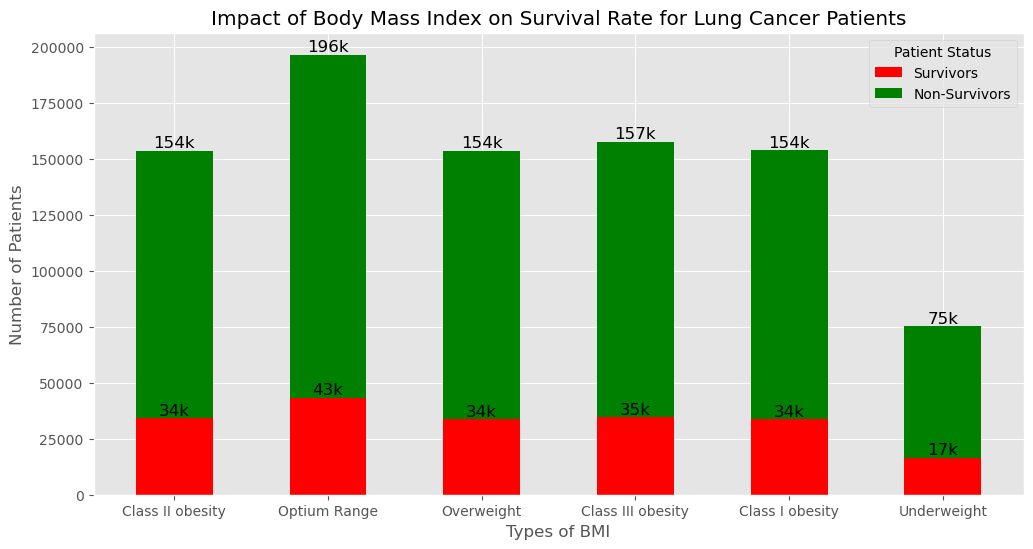

In [31]:
# Caculating the Number of Patients who din't survive
bmi_pandas_df ["NON-SURVIVOR COUNT"] = bmi_pandas_df ["TOTAL PATIENT COUNT"] - bmi_pandas_df ["SURVIVOR COUNT"]

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Plotting the Impact of BMI on Lung Cancer Patients

plt.figure (figsize=(12,6))
bar_1 = plt.bar(
            bmi_pandas_df ["BMI TYPES"], 
            bmi_pandas_df ["SURVIVOR COUNT"],
            color = "red",
            width = 0.5,
            label = "Survivors"
    )
bar_2 = plt.bar(
            bmi_pandas_df ["BMI TYPES"], 
            bmi_pandas_df ["NON-SURVIVOR COUNT"],
            color = "green",
            width = 0.5,
            bottom = bmi_pandas_df ["SURVIVOR COUNT"],
            label = "Non-Survivors"
    )
plt.title ("Impact of Body Mass Index on Survival Rate for Lung Cancer Patients")
plt.xlabel("Types of BMI")
plt.ylabel("Number of Patients")
plt.bar_label(bar_1, labels=[f"{values / 1000:.0f}k" for values in bmi_pandas_df ["SURVIVOR COUNT"]], fontsize=12)
plt.bar_label(bar_2, labels=[f"{values / 1000:.0f}k" for values in bmi_pandas_df ["TOTAL PATIENT COUNT"]], fontsize=12)
plt.legend(title= "Patient Status")
plt.show()


---

#### Impact of Cholestrol Levels on Survival Rate for Lung Cancer Patients

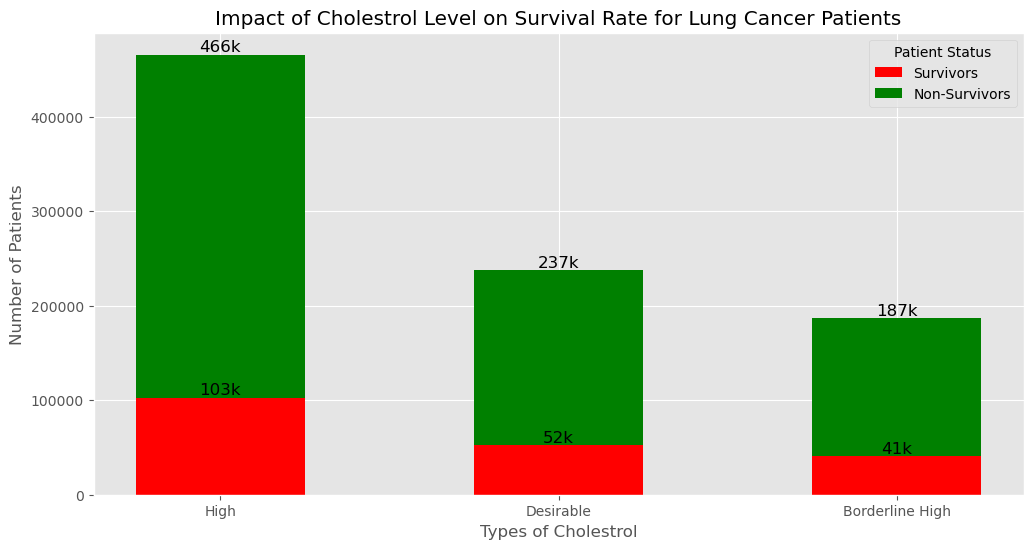

In [32]:
# Caculating the Number of Patients who din't survive
cholestrol_types_df ["NON-SURVIVOR COUNT"] = cholestrol_types_df ["TOTAL PATIENT COUNT"] - cholestrol_types_df ["SURVIVOR COUNT"]

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Plotting the Impact of Cholestrol Levels on Lung Cancer Patients

plt.figure (figsize=(12,6))
bar_1 = plt.bar(
            cholestrol_types_df ["CHOLESTROL TYPES"], 
            cholestrol_types_df ["SURVIVOR COUNT"],
            color = "red",
            width = 0.5,
            label = "Survivors"
    )
bar_2 =plt.bar(
            cholestrol_types_df ["CHOLESTROL TYPES"], 
            cholestrol_types_df ["NON-SURVIVOR COUNT"],
            color = "green",
            width = 0.5,
            bottom = cholestrol_types_df ["SURVIVOR COUNT"],
            label = "Non-Survivors"
    )
plt.title ("Impact of Cholestrol Level on Survival Rate for Lung Cancer Patients")
plt.xlabel("Types of Cholestrol")
plt.ylabel("Number of Patients")
plt.bar_label(bar_1, labels=[f"{values / 1000:.0f}k" for values in cholestrol_types_df ["SURVIVOR COUNT"]], fontsize=12)
plt.bar_label(bar_2, labels=[f"{values / 1000:.0f}k" for values in cholestrol_types_df ["TOTAL PATIENT COUNT"]], fontsize=12)
plt.legend(title= "Patient Status")
plt.show()


---

#### Impact of Smoking on Survival Rate for Lung Cancer Patients

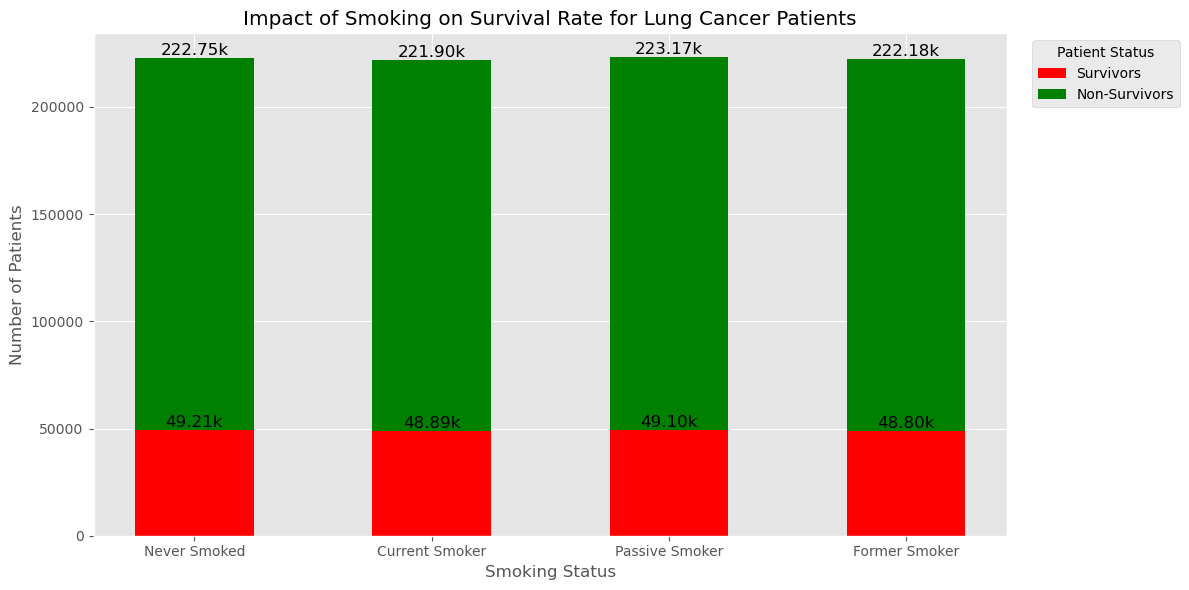

In [33]:
# Caculating the Number of Patients who din't survive
smoking_status_df ["NON-SURVIVOR COUNT"] = smoking_status_df ["NUMBER OF PATIENTS"] - smoking_status_df ["NUMBER OF SURVIVORS"]

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Plotting the Impact of Smoking on Lung Cancer Patients

plt.figure (figsize=(12,6))
bar_1 = plt.bar(
            smoking_status_df ["SMOKING STATUS"], 
            smoking_status_df ["NUMBER OF SURVIVORS"],
            color = "red",
            width = 0.5,
            label = "Survivors"
    )
bar_2 =plt.bar(
            smoking_status_df ["SMOKING STATUS"], 
            smoking_status_df ["NON-SURVIVOR COUNT"],
            color = "green",
            width = 0.5,
            bottom = smoking_status_df ["NUMBER OF SURVIVORS"],
            label = "Non-Survivors"
    )
plt.title ("Impact of Smoking on Survival Rate for Lung Cancer Patients")
plt.xlabel("Smoking Status")
plt.ylabel("Number of Patients")
plt.bar_label(bar_1, labels=[f"{values / 1000:.2f}k" for values in smoking_status_df ["NUMBER OF SURVIVORS"]], fontsize=12)
plt.bar_label(bar_2, labels=[f"{values / 1000:.2f}k" for values in smoking_status_df ["NUMBER OF PATIENTS"]], fontsize=12)
plt.legend(title= "Patient Status", bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()


---

## Conclusion
- Our Data confirms are initial belief that Non-Smoker's have a slightly higher survival rate compared to other smoking groups. All smoking categories have similar survival counts.
  
- Greece, Croatia and Czech Republic recorded the Highest Percentage of cancer patients diagnosed in Stage IV (ranging from 25.29 % to 25.5 %). This pattern could suggest poor or limited access to healthcare facilities  or high-cost treatments which people are unable to afford.
  
- However, it is important to note that the Lowest Percentages observed in Estonia, Bulgaria, and Slovakia of cancer patients diagnosed in Stage IV (ranging from 24.31% to 24.64%), which is only marginally lower than the highest value. This small difference between the highest and the lowest percentages suggest that the proportion of Stage IV cases is relatively consistent across all countries, which suggests that the differences in healthcare and cost of treatment might not be the primary factor.
  
- No matter the type of treatment one undergoes, the duration of the treatment is approximately the same.
  
- Upon analyzing a specific group of patients - Males who were diagnosed with either Stage III or Stage IV Cancer, who had a family history of cancer, who currently smoke, having a BMI greater than 30 and who survived. Our analysis indicated a 74.77% of those patients had hypertension and survived.

- Irrespective of the treatment type one undergoes, the average duration is almost identical (457 to 459 days Approx.). This indicates consistent treatment timelines regardless of the treatment type.

- The Data is not biased to any one gender. Male and Female patients and their survival rate are nearly the same.

- Stage I Cancer Patients have a slightly lower survival rate than Stage IV Cancer Patients (~0.3% difference). This indicates that late stage detection doesn't drastically impact the patient's survival rate.

- Stage II and Stage III Patients benefit the most from Surgery. While, Stage I and Stage IV benefit the most from Combined and Radiation.

- Across all stages, Patients with “Other Cancer” conditions show slightly lower survival across all stages. If the patient has a “Family History” or “has Hypertension” the odds of surviving is still better than that of “Other Cancer” conditions. Patients with a medical condition of “Asthma, Cirrhosis” have better odds of survival across all stages than any other medical condition.

- Survival Rates are consistent across all countries, indicating that there is no major regional disparity.

- Middle-Aged Patients tend to have a better survival rate. Younger Patients show marginally lower survival (21.91%). Survival Rate is fairly constant across all age groups.

- The Optium BMI Range show the most patient counts, with the highest survival count. Underweight patients show the lowest patient count and overall poor outcomes. Overall trend suggests that extremes in BMI contribute to lower survival rate.

- Patients with the highest cholestrol form the largest group and have the highest number of survivors. The difference in survival is small, indicating that cholesterol level alone isn’t a major determinant of lung cancer survival.

---

### Author : Russel Anthony Reynold Chandanshiv

---